<a href="https://colab.research.google.com/github/LilySu/DS-Unit-1-Sprint-4-Statistical-Tests-and-Experiments/blob/master/Lily_Su_Assignment13_LS_DS3_142_Sampling_Confidence_Intervals_and_Hypothesis_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 142
## Sampling, Confidence Intervals, and Hypothesis Testing

## Prepare - examine other available hypothesis tests

If you had to pick a single hypothesis test in your toolbox, t-test would probably be the best choice - but the good news is you don't have to pick just one! Here's some of the others to be aware of:

In [0]:
!pip install seaborn --upgrade
import os
os.kill(os.getpid(), 9)#kill system restart, upgrade package that is already installed
#seaborn needs to be upgraded on collab for 0.7

Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.9.0)


In [37]:
import numpy as np
from scipy.stats import chisquare  # One-way chi square test

# Chi square can take any crosstab/table and test the independence of rows/cols
# The null hypothesis is that the rows/cols are independent -> low chi square
# The alternative is that there is a dependence -> high chi square
# Be aware! Chi square does *not* tell you direction/causation

ind_obs = np.array([[1, 1], [2, 2]]).T
print(ind_obs)
print(chisquare(ind_obs, axis=None))

dep_obs = np.array([[16, 18, 16, 14, 12, 12], [32, 24, 16, 28, 20, 24]]).T
print(dep_obs)
print(chisquare(dep_obs, axis=None))

[[1 2]
 [1 2]]
Power_divergenceResult(statistic=0.6666666666666666, pvalue=0.8810148425137847)
[[16 32]
 [18 24]
 [16 16]
 [14 28]
 [12 20]
 [12 24]]
Power_divergenceResult(statistic=23.31034482758621, pvalue=0.015975692534127565)


In [38]:
# Distribution tests:
# We often assume that something is normal, but it can be important to *check*

# For example, later on with predictive modeling, a typical assumption is that
# residuals (prediction errors) are normal - checking is a good diagnostic

from scipy.stats import normaltest
# Poisson models arrival times and is related to the binomial (coinflip)
sample = np.random.poisson(5, 1000)
print(normaltest(sample))  # Pretty clearly not normal

NormaltestResult(statistic=59.56967717069347, pvalue=1.160403307505305e-13)


In [39]:
# Kruskal-Wallis H-test - compare the median rank between 2+ groups
# Can be applied to ranking decisions/outcomes/recommendations
# The underlying math comes from chi-square distribution, and is best for n>5
from scipy.stats import kruskal

x1 = [1, 3, 5, 7, 9]
y1 = [2, 4, 6, 8, 10]
print(kruskal(x1, y1))  # x1 is a little better, but not "significantly" so

x2 = [1, 1, 1]
y2 = [2, 2, 2]
z = [2, 2]  # Hey, a third group, and of different size!
print(kruskal(x2, y2, z))  # x clearly dominates

KruskalResult(statistic=0.2727272727272734, pvalue=0.6015081344405895)
KruskalResult(statistic=7.0, pvalue=0.0301973834223185)


And there's many more! `scipy.stats` is fairly comprehensive, though there are even more available if you delve into the extended world of statistics packages. As tests get increasingly obscure and specialized, the importance of knowing them by heart becomes small - but being able to look them up and figure them out when they *are* relevant is still important.

## Live Lecture - let's explore some more of scipy.stats

Candidate topics to explore:

- `scipy.stats.chi2` - the Chi-squared distribution, which we can use to reproduce the Chi-squared test
- Calculate the Chi-Squared test statistic "by hand" (with code), and feed it into `chi2`
- Build a confidence interval with `stats.t.ppf`, the t-distribution percentile point function (the inverse of the CDF) - we can write a function to return a tuple of `(mean, lower bound, upper bound)` that you can then use for the assignment (visualizing confidence intervals)

In [40]:
# Taking requests! Come to lecture with a topic or problem and we'll try it.
gender = ['male', 'male','male', 'female','female','female']
eats_outside = ['outside','inside','inside','inside','outside','outside']
import pandas as pd
df = pd.DataFrame({'gender':gender, 'preference': eats_outside})
df.head(6)

,gender,preference
0,male,outside
1,male,inside
2,male,inside
3,female,inside
4,female,outside
5,female,outside


In [41]:
table = pd.crosstab(df.gender,df.preference)
table

preference,inside,outside
gender,,
female,1,2
male,2,1


In [42]:
pd.crosstab(df.gender,df.preference, margins = True)#sums up total

preference,inside,outside,All
gender,,,
female,1,2,3
male,2,1,3
All,3,3,6


In [43]:
df = df.replace("male",0)
df = df.replace("female",1)
df = df.replace("outside",0)
df = df.replace("inside",1)
df.head()

,gender,preference
0,0,0
1,0,1
2,0,1
3,1,1
4,1,0


In [44]:
pd.crosstab(df.gender, df.preference, margins=True)

expected = [[1.5, 1.5],
           [1.5, 1.5]]
#marginal proportions

#total # f males (first row)=3




#marginal proportion first row
#obs/ttal = (3 males)/(6 humans)

pd.crosstab(df.gender,df.preference, margins=True, normalize='all')

#observed is a table of the marginal proportions of each subgroup, actual deviations
observed = np.array[[.5,.5]
                   [.5,.5]]
#what you observed was the groups themselve were balanced.

deviation = numerator = observed - expected
print(numerator)

deviation_squared = deviation**2
print("deviation squared \n", deviation_squared)

fraction = (deviation_squared/expected)
print('fraction: \n', fraction)

Chi2 = fraction.sum()
print(chi2/4)

TypeError: ignored

In [45]:
chi_data = [[1,2],[2,1]]
from scipy.stats import chisquare

chisquare(chi_data, axis=None)
#take our chisquare statistic, giving a p-value
#even though there were disproportionate people sitting outside or inside, you fail to reject the null hypothesis that they are dependent.
#chi2 up, p value down.

Power_divergenceResult(statistic=0.6666666666666666, pvalue=0.8810148425137847)

In [46]:
expected_values = [[1.5,1.5], [1.5,1.5]]
deviation = (((.5)**2)/1.5)*4
print(deviation)

0.6666666666666666


In [47]:
from scipy.stats import chi2_contingency

table = [[1,2],[2,4]]
chi2statistic,pvalue, dof,observed = chi2_contingency(table) 

print('chi2 stat',chi2statistic)
print('p-value',pvalue)
print('degrees of freedom',dof)
print('Contingency Table: \n',observed)

chi2 stat 0.0
p-value 1.0
degrees of freedom 1
Contingency Table: 
 [[1. 2.]
 [2. 4.]]


In [48]:
def lazy_chisquare(observed, expected):
  chisquare = 0
  for row_obs, row_exp in zip(observed, expected):
    for obs, exp in zip(row_obs,row_exp):
      chisquare += (obs - exp)**2 / exp
  return chisquare

chi_data = [[1,2],[2,1]]
expected_values = [[1.5,1.5],[1.5,1.5]]
chistat = lazy_chisquare(chi_data, expected_values)
chistat

0.6666666666666666

#,# Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):

1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

In [49]:
# TODO - your code!
#95% of the time, my data will lie within these inner bound and upper bound. 
# how do we calculate confidence interval. 
coinflips = np.random.binomial(n=1,p=.7, size=100)
print(coinflips)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 0 1
 1 1 1 1 0 0 0 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 0 1 0 1 1 0 1 1 0 0 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1]


In [50]:
import scipy.stats as stats
stats.ttest_1samp(coinflips,0.5)
#turn to numpy area
# calculating statndard error and mean
#multiply by p value


#shave off % from left or right side
#confidence interval is also alpha value

#in a two sample t test mean is outside confidence interval, is not statistically significant

#null hyp outisde confidence interval - doesnt have to  be a mean
#confidence interval gets smaller with bigger sample size

#what is standard error vs variance
#standard version of variance

Ttest_1sampResult(statistic=7.084225912631068, pvalue=2.069438753561787e-10)

In [0]:
# Confidence intervals!
# Similar to hypothesis testing, but centered at sample mean
# Generally better than reporting the "point estimate" (sample mean)
# Why? Because point estimates aren't always perfect
import numpy as np
from scipy import stats


def confidence_interval(data, confidence=0.95):
  """
  Calculate a confidence interval around a sample mean for given data.
  Using t-distribution and two-tailed test, default 95% confidence. 
  
  Arguments:
    data - iterable (list or numpy array) of sample observations
    confidence - level of confidence for the interval
  
  Returns:
    tuple of (mean, lower bound, upper bound)
  """
  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  stderr = stats.sem(data)
  interval = stderr * stats.t.ppf((1 + confidence) / 2., n - 1)
  return (mean, mean - interval, mean + interval)


def report_confidence_interval(confidence_interval):
  """
  Return a string with a pretty report of a confidence interval.
  
  Arguments:
    confidence_interval - tuple of (mean, lower bound, upper bound)
  
  Returns:
    None, but prints to screen the report
  """
  #print('Mean: {}'.format(confidence_interval[0]))
  #print('Lower bound: {}'.format(confidence_interval[1]))
  #print('Upper bound: {}'.format(confidence_interval[2]))
  s = "our mean lies in the interval [{:.2}, {:.2}]".format(
      confidence_interval[1], confidence_interval[2])
  return s

In [52]:
coin_ci = confidence_interval(coinflips)
coin_ci

(0.79, 0.7087740590102375, 0.8712259409897626)

In [53]:
coin_btw = report_confidence_interval(coin_ci)# Default 95% conf
coin_btw

'our mean lies in the interval [0.71, 0.87]'

In [0]:
import numpy as np

In [0]:
congressional_Voting_R = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data')

In [0]:
con = congressional_Voting_R.replace({'n': 0, 'y': 1, '?': np.nan})
c = con.dropna()
c.columns = ['party','handicapped-infants','water-project-cost-sharing','adoption-of-the-budget-resolution','physician-fee-freeze','el-salvador-aid', 'religious-groups-schools', 'anti-satellite-test-ban', 'aid-to-nicaraguan-contras','mx-missile', 'immigration','synfuels-corporation-cutback','education-spending','superfund-right-to-sue', 'crime', 'duty-free-exports', 'export-administration-act-south-africa']

In [0]:
dem = c[c['party']=='democrat']
rep = c[c['party']=='republican']

In [129]:
dem = dem.drop(columns = ['party'])
dem.head(3)


,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
4,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
18,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
22,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [130]:
rep = rep.drop(columns = ['party'])
rep.head(3)

,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
7,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
27,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
29,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0


In [131]:
ci_dem = dem.apply(lambda x : confidence_interval(list(x)))
ci_dem

handicapped-infants                       (0.5887096774193549, 0.5008854514528094, 0.676...
water-project-cost-sharing                (0.45161290322580644, 0.3627917755681809, 0.54...
adoption-of-the-budget-resolution         (0.8548387096774194, 0.791966749899413, 0.9177...
physician-fee-freeze                      (0.04838709677419355, 0.01008836071171925, 0.0...
el-salvador-aid                           (0.20161290322580644, 0.13000591391201893, 0.2...
religious-groups-schools                  (0.4435483870967742, 0.3548790007497182, 0.532...
anti-satellite-test-ban                   (0.7661290322580645, 0.6905800506734978, 0.841...
aid-to-nicaraguan-contras                 (0.8306451612903226, 0.7637035637475735, 0.897...
mx-missile                                (0.7903225806451613, 0.7176672431336555, 0.862...
immigration                               (0.532258064516129, 0.44320399355877216, 0.621...
synfuels-corporation-cutback              (0.5080645161290323, 0.418836136782227

In [132]:
ci_rep = rep.apply(lambda x : confidence_interval(list(x)))
ci_rep

handicapped-infants                       (0.21296296296296297, 0.13450349074958223, 0.2...
water-project-cost-sharing                (0.4722222222222222, 0.3765480931771919, 0.567...
adoption-of-the-budget-resolution         (0.1574074074074074, 0.08761355698812177, 0.22...
physician-fee-freeze                      (0.9907407407407407, 0.9723853391655276, 1.009...
el-salvador-aid                           (0.9537037037037037, 0.913434261310743, 0.9939...
religious-groups-schools                  (0.8703703703703703, 0.8059979340740583, 0.934...
anti-satellite-test-ban                   (0.26851851851851855, 0.18358393802160433, 0.3...
aid-to-nicaraguan-contras                 (0.14814814814814814, 0.08006715123831286, 0.2...
mx-missile                                (0.1388888888888889, 0.07261245914426012, 0.20...
immigration                               (0.5740740740740741, 0.4793093369789436, 0.668...
synfuels-corporation-cutback              (0.1574074074074074, 0.087613556988121

In [133]:
ourmean_dem = ci_dem.apply(lambda x : report_confidence_interval(list(x)))
ourmean_dem


handicapped-infants                         our mean lies in the interval [0.5, 0.68]
water-project-cost-sharing                 our mean lies in the interval [0.36, 0.54]
adoption-of-the-budget-resolution          our mean lies in the interval [0.79, 0.92]
physician-fee-freeze                      our mean lies in the interval [0.01, 0.087]
el-salvador-aid                            our mean lies in the interval [0.13, 0.27]
religious-groups-schools                   our mean lies in the interval [0.35, 0.53]
anti-satellite-test-ban                    our mean lies in the interval [0.69, 0.84]
aid-to-nicaraguan-contras                   our mean lies in the interval [0.76, 0.9]
mx-missile                                 our mean lies in the interval [0.72, 0.86]
immigration                                our mean lies in the interval [0.44, 0.62]
synfuels-corporation-cutback                our mean lies in the interval [0.42, 0.6]
education-spending                        our mean lie

In [134]:
ourmean_rep = ci_rep.apply(lambda x : report_confidence_interval(list(x)))
ourmean_rep

handicapped-infants                        our mean lies in the interval [0.13, 0.29]
water-project-cost-sharing                 our mean lies in the interval [0.38, 0.57]
adoption-of-the-budget-resolution         our mean lies in the interval [0.088, 0.23]
physician-fee-freeze                        our mean lies in the interval [0.97, 1.0]
el-salvador-aid                            our mean lies in the interval [0.91, 0.99]
religious-groups-schools                   our mean lies in the interval [0.81, 0.93]
anti-satellite-test-ban                    our mean lies in the interval [0.18, 0.35]
aid-to-nicaraguan-contras                  our mean lies in the interval [0.08, 0.22]
mx-missile                                our mean lies in the interval [0.073, 0.21]
immigration                                our mean lies in the interval [0.48, 0.67]
synfuels-corporation-cutback              our mean lies in the interval [0.088, 0.23]
education-spending                         our mean li

In [0]:
def ci_for_graphing(confidence_interval):
  """
  Return a mean range for the confidence interval.

  """
  s = "[{:.2}, {:.2}]".format(
      confidence_interval[1], confidence_interval[2])
  return s

In [151]:
dem_ci_forgraphing = ci_dem.apply(lambda x : ci_for_graphing(list(x)))
dem_ci_forgraphing

handicapped-infants                         [0.5, 0.68]
water-project-cost-sharing                 [0.36, 0.54]
adoption-of-the-budget-resolution          [0.79, 0.92]
physician-fee-freeze                      [0.01, 0.087]
el-salvador-aid                            [0.13, 0.27]
religious-groups-schools                   [0.35, 0.53]
anti-satellite-test-ban                    [0.69, 0.84]
aid-to-nicaraguan-contras                   [0.76, 0.9]
mx-missile                                 [0.72, 0.86]
immigration                                [0.44, 0.62]
synfuels-corporation-cutback                [0.42, 0.6]
education-spending                        [0.069, 0.19]
superfund-right-to-sue                     [0.21, 0.37]
crime                                      [0.26, 0.43]
duty-free-exports                          [0.51, 0.68]
export-administration-act-south-africa      [0.9, 0.98]
dtype: object

In [152]:
demci_list = dem_ci_forgraphing.tolist()
demci_list

['[0.5, 0.68]',
 '[0.36, 0.54]',
 '[0.79, 0.92]',
 '[0.01, 0.087]',
 '[0.13, 0.27]',
 '[0.35, 0.53]',
 '[0.69, 0.84]',
 '[0.76, 0.9]',
 '[0.72, 0.86]',
 '[0.44, 0.62]',
 '[0.42, 0.6]',
 '[0.069, 0.19]',
 '[0.21, 0.37]',
 '[0.26, 0.43]',
 '[0.51, 0.68]',
 '[0.9, 0.98]']

In [147]:
df_ci = pd.Series((v[0] for v in demci_list))
df_ci

0     [
1     [
2     [
3     [
4     [
5     [
6     [
7     [
8     [
9     [
10    [
11    [
12    [
13    [
14    [
15    [
dtype: object

In [144]:
re_index = ['handicapped-infants','water-project-cost-sharing','adoption-of-the-budget-resolution','physician-fee-freeze','el-salvador-aid', 'religious-groups-schools', 'anti-satellite-test-ban', 'aid-to-nicaraguan-contras','mx-missile', 'immigration','synfuels-corporation-cutback','education-spending','superfund-right-to-sue', 'crime', 'duty-free-exports', 'export-administration-act-south-africa']
dem_ci_forgraphing.reindex([pd.Index(re_index)])

handicapped-infants                       NaN
water-project-cost-sharing                NaN
adoption-of-the-budget-resolution         NaN
physician-fee-freeze                      NaN
el-salvador-aid                           NaN
religious-groups-schools                  NaN
anti-satellite-test-ban                   NaN
aid-to-nicaraguan-contras                 NaN
mx-missile                                NaN
immigration                               NaN
synfuels-corporation-cutback              NaN
education-spending                        NaN
superfund-right-to-sue                    NaN
crime                                     NaN
duty-free-exports                         NaN
export-administration-act-south-africa    NaN
dtype: object

In [124]:
rep_ci_forgraphing = ci_rep.apply(lambda x : ci_for_graphing(list(x)))
rep_ci_forgraphing

handicapped-infants                        [0.13, 0.29]
water-project-cost-sharing                 [0.38, 0.57]
adoption-of-the-budget-resolution         [0.088, 0.23]
physician-fee-freeze                        [0.97, 1.0]
el-salvador-aid                            [0.91, 0.99]
religious-groups-in-schools                [0.81, 0.93]
anti-satellite-test-ban                    [0.18, 0.35]
aid-to-nicaraguan-contras                  [0.08, 0.22]
mx-missile                                [0.073, 0.21]
immigration                                [0.48, 0.67]
synfuels-corporation-cutback              [0.088, 0.23]
education-spending                         [0.78, 0.92]
superfund-right-to-sue                     [0.77, 0.91]
crime                                       [0.96, 1.0]
duty-free-exports                         [0.051, 0.17]
export-administration-act-south-africa     [0.58, 0.76]
dtype: object

In [154]:
sales = [('handicapped-infants', 0.13, 0.29),
         ('water-project-cost-sharing', 0.38, 0.57),
         ('adoption-of-the-budget-resolution', 0.088, 0.23)]
labels = ['Topic', 'Min Mean', 'Max Mean']
df = pd.DataFrame.from_records(sales, columns=labels)
df

,Topic,Min Mean,Max Mean
0,handicapped-infants,0.130,0.29
1,water-project-cost-sharing,0.380,0.57
2,adoption-of-the-budget-resolution,0.088,0.23


In [0]:
import matplotlib as plt

In [0]:
from __future__ import division, print_function
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
# In a notebook environment, display the plots inline
%matplotlib inline

# Set some parameters to apply to all plots. These can be overridden
# in each plot if desired
import matplotlib
# Plot size to 14" x 7"
matplotlib.rc('figure', figsize = (14, 7))
# Font size to 14
matplotlib.rc('font', size = 14)
# Do not display top and right frame lines
matplotlib.rc('axes.spines', top = False, right = False)
# Remove grid lines
matplotlib.rc('axes', grid = False)
# Set backgound color to white
matplotlib.rc('axes', facecolor = 'white')

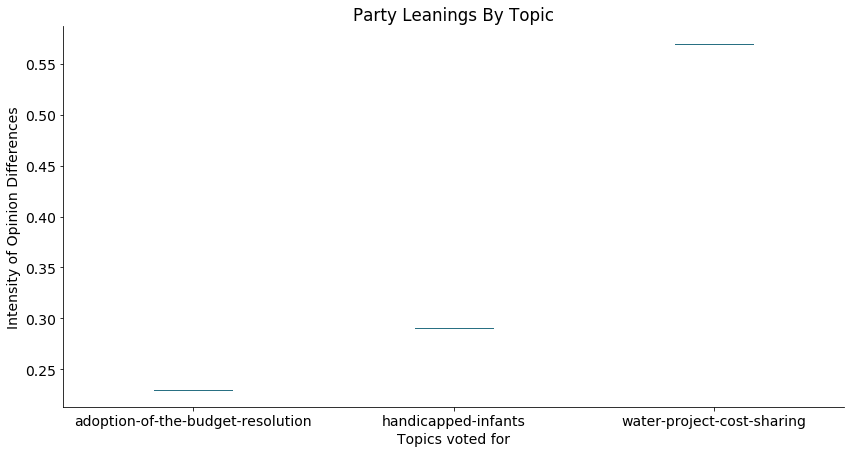

In [169]:
# Unlike with bar plots, there is no need to aggregate the data
# before plotting
# However the data for each group (day) needs to be defined
days = np.unique(df['Topic'])
bp_data = []
for day in days:
    bp_data.append(df[df['Topic'] == day]['Max Mean'].values)

# Define a function to create a boxplot:
def boxplot(x_data, y_data, base_color, median_color, x_label, y_label, title):
    _, ax = plt.subplots()

    # Draw boxplots, specifying desired style
    ax.boxplot(y_data
               # patch_artist must be True to control box fill
               , patch_artist = True
               # Properties of median line
               , medianprops = {'color': median_color}
               # Properties of box
               , boxprops = {'color': base_color, 'facecolor': base_color}
               # Properties of whiskers
               , whiskerprops = {'color': base_color}
               # Properties of whisker caps
               , capprops = {'color': base_color})

    # By default, the tick label starts at 1 and increments by 1 for
    # each box drawn. This sets the labels to the ones we want
    ax.set_xticklabels(x_data)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)

# Call the function to create plot
boxplot(x_data = days
        , y_data = bp_data
        , base_color = '#539caf'
        , median_color = '#297083'
        , x_label = 'Topics voted for'
        , y_label = 'Intensity of Opinion Differences'
        , title = 'Party Leanings By Topic')

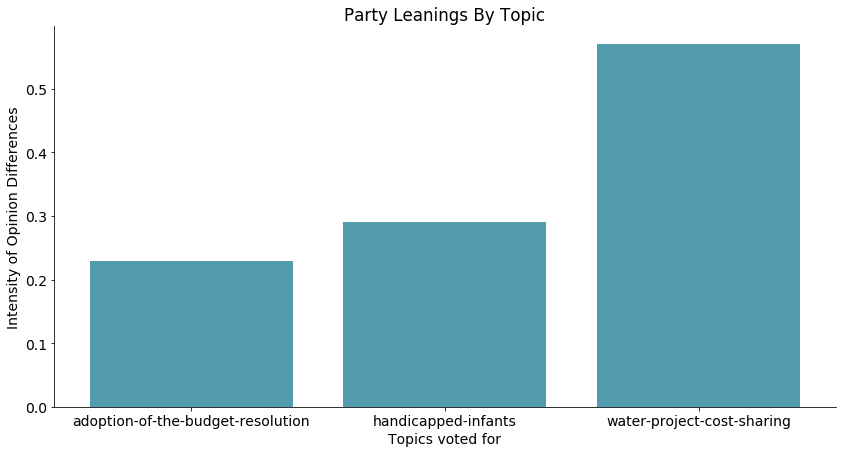

In [168]:
# Calculate the mean and standard deviation for number of check outs
# each day
mean_total_co_day = df[['Topic', 'Max Mean']].groupby('Topic').agg([np.mean, np.std])
mean_total_co_day.columns = mean_total_co_day.columns.droplevel()

# Define a function for a bar plot
def barplot(x_data, y_data, error_data, x_label, y_label, title):
    _, ax = plt.subplots()
    # Draw bars, position them in the center of the tick mark on the x-axis
    ax.bar(x_data, y_data, color = '#539caf', align = 'center')
    # Draw error bars to show standard deviation, set ls to 'none'
    # to remove line between points
    ax.errorbar(x_data, y_data, yerr = error_data, color = '#297083', ls = 'none', lw = 2, capthick = 2)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)

# Call the function to create plot
barplot(x_data = mean_total_co_day.index.values
        , y_data = mean_total_co_day['mean']
        , error_data = mean_total_co_day['std']
        , x_label = 'Topics voted for'
        , y_label = 'Intensity of Opinion Differences'
        , title = 'Party Leanings By Topic')

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)